In [94]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [95]:
df= pd.read_csv('Financial-Campaign-full.csv')#loads the csv file into a pandas dataframe
df.head() #returns the first 5 rows

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome
0,34,blue-collar,married,secondary,no,7216,yes,no,unknown,26,may,143,2,-1,0,unknown,no
1,29,housemaid,married,secondary,no,823,yes,no,unknown,23,may,14,2,-1,0,unknown,no
2,41,blue-collar,married,primary,no,17,no,no,cellular,8,jul,117,3,-1,0,unknown,no
3,37,technician,married,secondary,no,729,yes,no,cellular,15,jul,115,5,-1,0,unknown,no
4,32,blue-collar,single,secondary,no,15341,no,no,unknown,21,may,738,3,-1,0,unknown,no


## Data Exploration

There are 10 non numeric columns that we need to consider if we want to include that in our analysis because we will need to convert them to numeric values for clustering purposes.

In [96]:
df.select_dtypes(include=['object']).columns


Index(['Job', 'Marital', 'Education', 'Credit?', 'HousingLoan', 'PersonalLoan',
       'Contact', 'LastMonth', 'POutcome', 'Coutcome'],
      dtype='object')

From the findings of the POutcome column, majority of this column has unknown values. Based on these findings, we decided that this is not a good column to include in our 

Avg age is 40.9, medium age is 39, oldest is 95, youngest is 18.

This tells us here are alot of middle aged people starting from 30 to 60

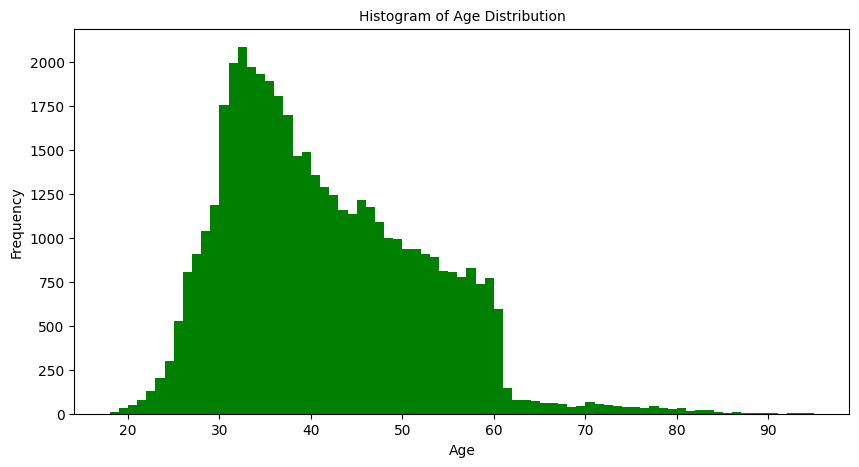

In [288]:
# Age stuff
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].values, rwidth=1, bins =77, color='green')
plt.title('Histogram of Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

count     45208.000000
mean       1362.319766
std        3044.857298
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance, dtype: float64

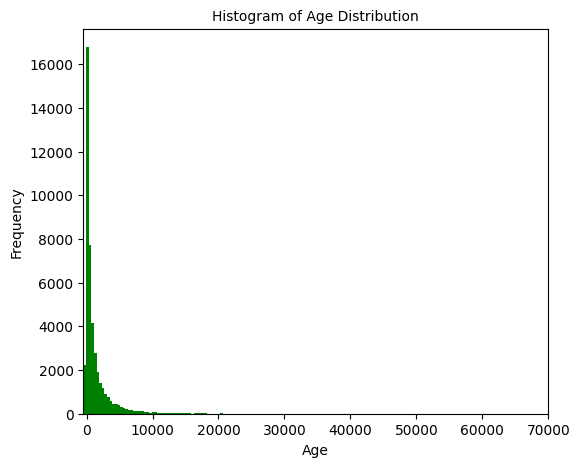

In [301]:
# Age stuff
plt.figure(figsize=(6, 5))
plt.hist(df['Balance'].values, rwidth=1, bins =277, color='green')
plt.title('Histogram of Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.xlim(-500, 70000)

df['Balance'].describe()

25.984339055034507


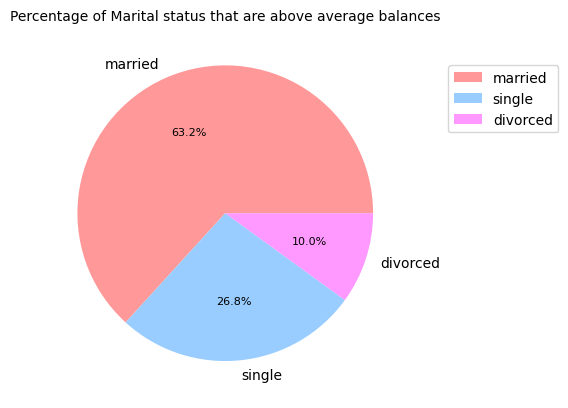

In [276]:
#len(df[(df['Balance'] > 0)])


average_balance = df['Balance'].mean() 

above_average_bal = len(df[df['Balance'] > average_balance]) #number of people that have above average balances
#df.describe()
divorced = df[df['Marital'] == 'divorced'] #all divorced users
marital_titles = df['Marital'].value_counts().index.to_list()

above_avg_bal_divorced = len(divorced[divorced['Balance'] > average_balance])

marital_above_average_bal = [] 
status_total = 0
marital_percentage_above_average_bal = []


for m in marital_titles: 
    status_total = df[df['Marital'] == m]
    marital_above_average_bal.append(len(status_total[status_total['Balance'] > average_balance]))
    #x.append({m:len(status_total[status_total['Balance'] > average_balance])})
    #x.append(len(status_total[status_total['Balance'] > average_balance]) / len(df['Marital']))

total_count = sum(marital_above_average_bal)
for marital in marital_above_average_bal:
    marital_percentage_above_average_bal.append(marital / total_count * 100)


print(total_count / len(df) * 100)
#print(average_balance)



bar_colors = ['#FF9999', '#99CCFF', '#FF99FF']

plt.pie(marital_percentage_above_average_bal,  colors=bar_colors, labels=marital_titles,autopct='%1.1f%%')

plt.title('Percentage of Marital status that are above average balances')
plt.legend(loc="lower right", bbox_to_anchor=(1.42,0.7))

plt.show()


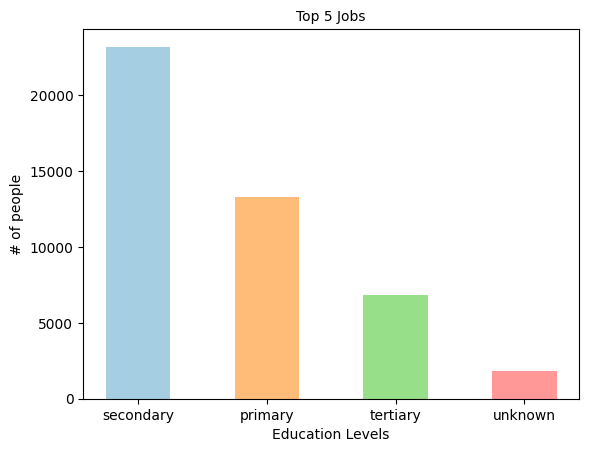

In [216]:
bar_colors = ['#a6cee3', '#ffbb78', '#98df8a', '#ff9896', '#cfa3e3']

plt.bar(df['Education'].unique(), df["Education"].value_counts(), color=bar_colors, align='center', width=0.5)

plt.ylabel('# of people')
plt.xlabel('Education Levels')
plt.title('Top 5 Jobs')

plt.show()

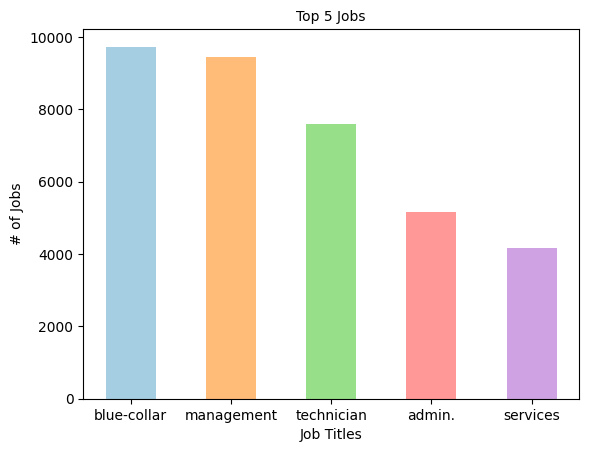

In [268]:
job_title = df['Job'].value_counts()[:5].index.to_list()

job_counts = df['Job'].value_counts()[:5]

# Convert the value counts to a NumPy array
job_counts_array = job_counts.values

#job_title = ['Blue Collar', 'House Maid', 'Technician', 'Management', 'Entrepreneur']

bar_colors = ['#a6cee3', '#ffbb78', '#98df8a', '#ff9896', '#cfa3e3']

plt.bar(job_title, job_counts, color=bar_colors, label=job_title, align='center', width=0.5)

plt.ylabel('# of Jobs')
plt.xlabel('Job Titles')
plt.title('Top 5 Jobs')
#plt.legend(title='Fruit color')

plt.show()



Bar Chart of different jobs that have credit or not 

<h2>Data Cleaning<h2>

In [98]:
percentage_unknown = (df['POutcome'].str.contains('unknown')).sum() / len(df) * 100

print(percentage_unknown)

81.74659352327022


From the findings of the POutcome column, majority of this column has unknown values. Based on these findings, we decided that this is not a good column to include in our analysis of the financial institution

In [99]:
df['LastMonth'].unique()

array(['may', 'jul', 'jun', 'mayY', 'aug', 'oct', 'nov', 'dec', 'jan',
       'feb', 'mar', 'apr', 'sep'], dtype=object)

Entry #13 has an error month is labeled as mayY (drop this record or replace)